In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (mean_squared_error, r2_score,mean_absolute_error
                             ,accuracy_score, precision_score, recall_score)
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

In [36]:
df=pd.read_csv("C:\\Users\\kiril\\Downloads\\Telegram Desktop\\Airline Quality Ratings.csv")

In [37]:
df=df.dropna()

In [38]:
df.head()

ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0  ...                 3             5                 2            5   
1  ...                 5             4                 5            5   
2  ...                 3             5                 3            5   
3  ...                 5             5                 5            4   
4  ...                 3             4                 4            5   

   Food and Drink  In-flight Service  In-flight Wifi Service  \
0               5                  5                       3   
1               3                  5                       2   
2               5                  3                       4   
3               4                  5                       2   
4               4                  3                       3   

   In-flight Entertainment  Baggage Handling             Satisfaction  
0                        5                 5  Neutral or Dissatisfied  
1                        5                 5                Satisfied  
2                        3                 3                Satisfied  
3                        5                 5                Satisfied  
4                        3                 3                Satisfied  

[5 rows x 24 columns]

In [39]:
df.info()
df=df.drop('ID',axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129487 non-null  int64  
 1   Gender                                  129487 non-null  object 
 2   Age                                     129487 non-null  int64  
 3   Customer Type                           129487 non-null  object 
 4   Type of Travel                          129487 non-null  object 
 5   Class                                   129487 non-null  object 
 6   Flight Distance                         129487 non-null  int64  
 7   Departure Delay                         129487 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129487 non-null  int64  
 10  Ease of Online Booking                  129487 no

In [40]:
df['Customer Type'] = df['Customer Type'].map({'First-time': 0, 'Returning': 1})
df['Type of Travel'] = df['Type of Travel'].map({'Business': 0, 'Personal': 1})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df=pd.get_dummies(data=df,columns=['Class'],drop_first=True,dtype=int)   

In [41]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129487 non-null  int64  
 1   Age                                     129487 non-null  int64  
 2   Customer Type                           129487 non-null  int64  
 3   Type of Travel                          129487 non-null  int64  
 4   Flight Distance                         129487 non-null  int64  
 5   Departure Delay                         129487 non-null  int64  
 6   Arrival Delay                           129487 non-null  float64
 7   Departure and Arrival Time Convenience  129487 non-null  int64  
 8   Ease of Online Booking                  129487 non-null  int64  
 9   Check-in Service                        129487 non-null  int64  
 10  Online Boarding                         129487 no

In [42]:
df['Satisfaction']

0         Neutral or Dissatisfied
1                       Satisfied
2                       Satisfied
3                       Satisfied
4                       Satisfied
                   ...           
129875    Neutral or Dissatisfied
129876    Neutral or Dissatisfied
129877    Neutral or Dissatisfied
129878                  Satisfied
129879    Neutral or Dissatisfied
Name: Satisfaction, Length: 129487, dtype: object

In [43]:
df['Satisfaction'] = df['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})


In [44]:
df['Satisfaction']

0         0
1         1
2         1
3         1
4         1
         ..
129875    0
129876    0
129877    0
129878    1
129879    0
Name: Satisfaction, Length: 129487, dtype: int64

In [45]:
df.head()

Gender  Age  Customer Type  Type of Travel  Flight Distance  \
0       0   48              0               0              821   
1       1   35              1               0              821   
2       0   41              1               0              853   
3       0   50              1               0             1905   
4       1   49              1               0             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   Ease of Online Booking  Check-in Service  ...  Leg Room Service  \
0                       3                 4  ...                 2   
1                       2                 3  ...                 5   
2                       4                 4  ...                 3   
3                       2                 3  ...                 5   
4                       3                 3  ...                 4   

   Cleanliness  Food and Drink  In-flight Service  In-flight Wifi Service  \
0            5               5                  5                       3   
1            5               3                  5                       2   
2            5               5                  3                       4   
3            4               4                  5                       2   
4            5               4                  3                       3   

   In-flight Entertainment  Baggage Handling  Satisfaction  Class_Economy  \
0                        5                 5             0              0   
1                        5                 5             1              0   
2                        3                 3             1              0   
3                        5                 5             1              0   
4                        3                 3             1              0   

   Class_Economy Plus  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 24 columns]

<Axes: >

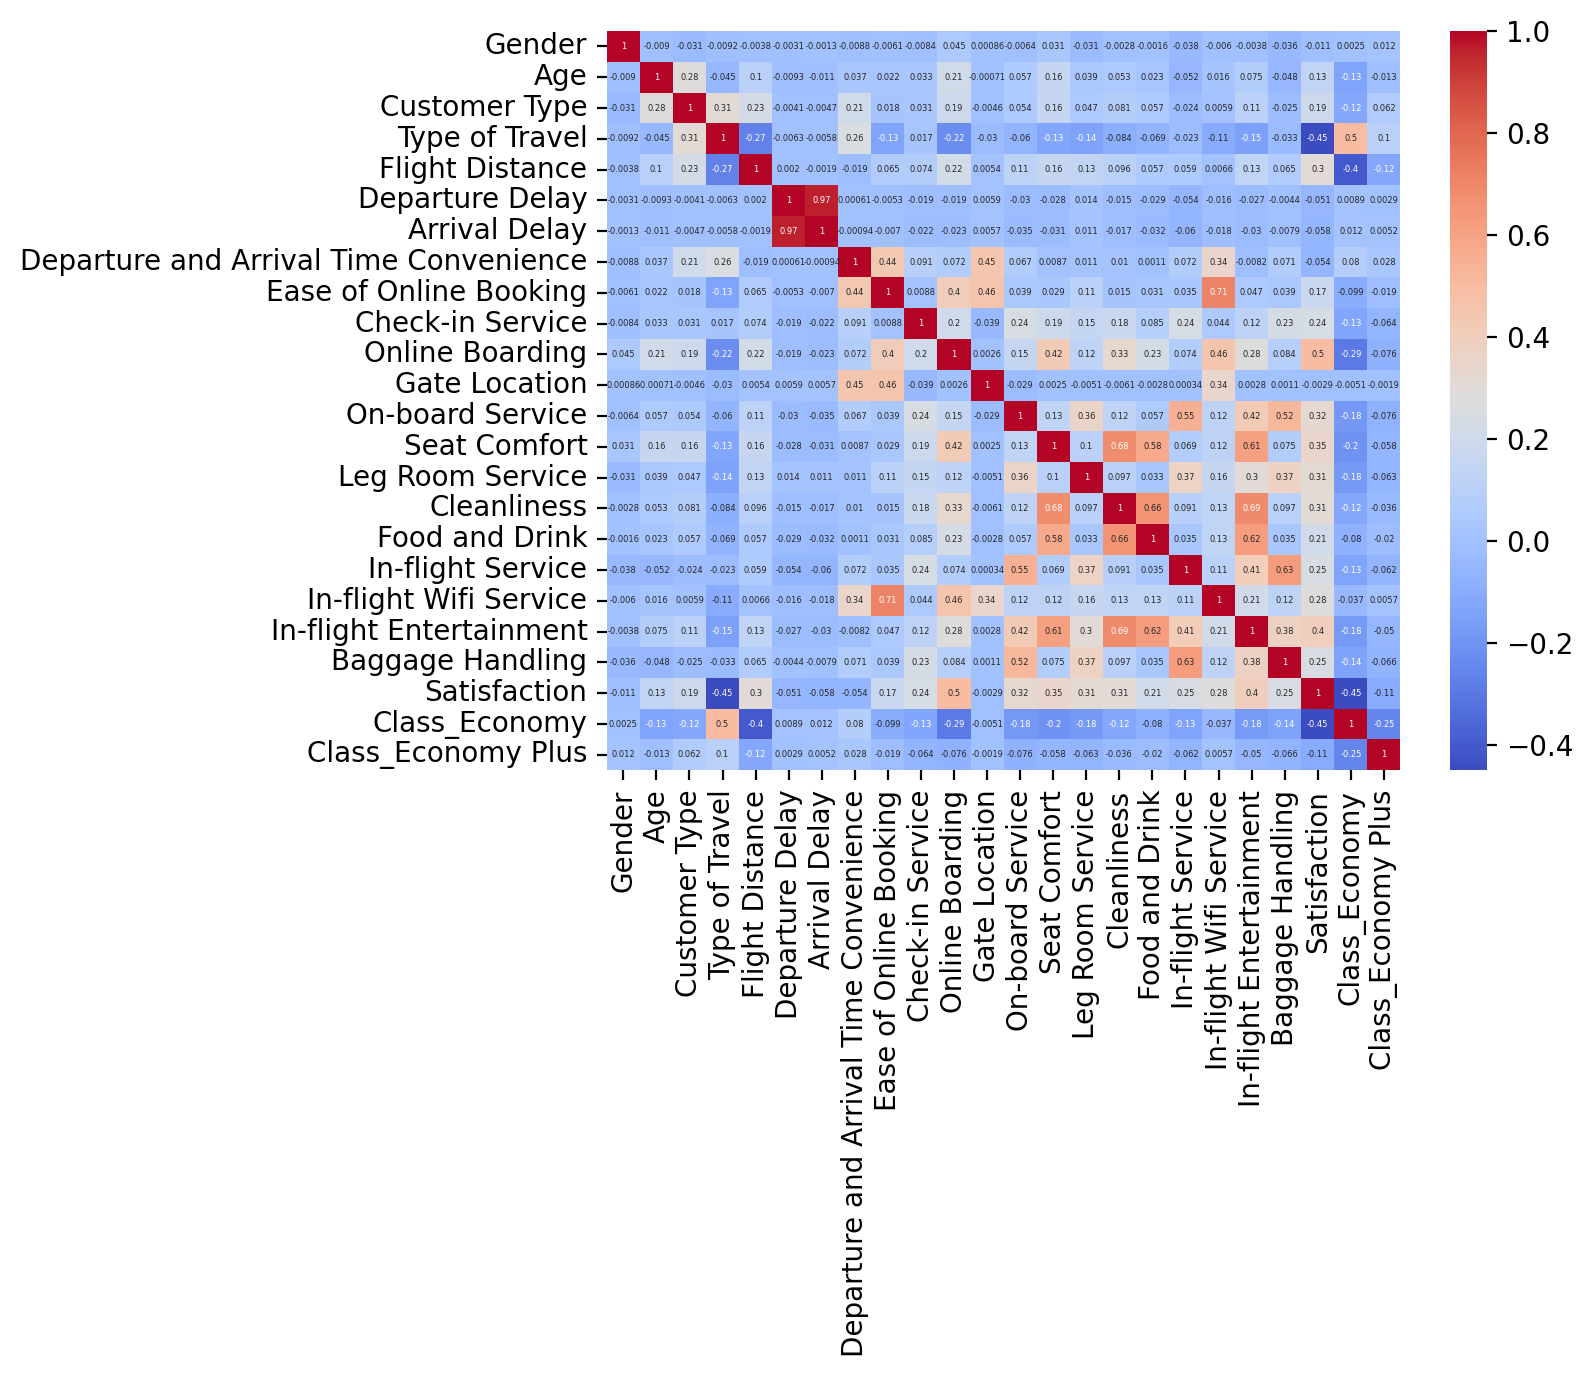

In [46]:
plt.figure(dpi=200)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',annot_kws={'size':3}) 

<Axes: xlabel='Satisfaction', ylabel='Count'>

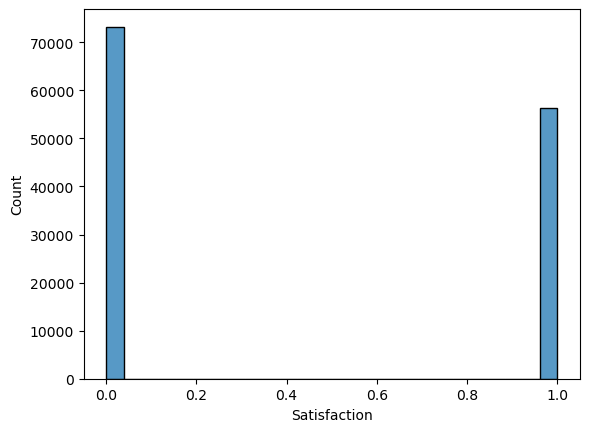

In [47]:
sns.histplot(df['Satisfaction'])

In [48]:
lst_11=[]
lst_00=[]
for i in range(0,df.shape[0]):
    if df['Satisfaction'].iloc[i]==1.0:
        lst_11.append(df['Satisfaction'].iloc[i])
    else:
        lst_00.append(df['Satisfaction'].iloc[i])   
print(len(lst_11)/df.shape[0]*100)
print(len(lst_00)/df.shape[0]*100)

43.449921613752736
56.55007838624727


In [49]:
df.head(10)

Gender  Age  Customer Type  Type of Travel  Flight Distance  \
0       0   48              0               0              821   
1       1   35              1               0              821   
2       0   41              1               0              853   
3       0   50              1               0             1905   
4       1   49              1               0             3470   
5       0   43              1               0             3788   
6       0   43              1               0             1963   
7       1   60              1               0              853   
8       0   50              1               0             2607   
9       1   38              1               0             2822   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   
5                0            0.0                                       4   
6                0            0.0                                       3   
7                0            3.0                                       3   
8                0            0.0                                       1   
9               13            0.0                                       2   

   Ease of Online Booking  Check-in Service  ...  Leg Room Service  \
0                       3                 4  ...                 2   
1                       2                 3  ...                 5   
2                       4                 4  ...                 3   
3                       2                 3  ...                 5   
4                       3                 3  ...                 4   
5                       4                 3  ...                 4   
6                       3                 4  ...                 5   
7                       4                 3  ...                 4   
8                       1                 3  ...                 4   
9                       5                 3  ...                 5   

   Cleanliness  Food and Drink  In-flight Service  In-flight Wifi Service  \
0            5               5                  5                       3   
1            5               3                  5                       2   
2            5               5                  3                       4   
3            4               4                  5                       2   
4            5               4                  3                       3   
5            3               3                  4                       4   
6            4               5                  5                       3   
7            4               4                  3                       4   
8            3               3                  4                       4   
9            4               2                  5                       2   

   In-flight Entertainment  Baggage Handling  Satisfaction  Class_Economy  \
0                        5                 5             0              0   
1                        5                 5             1              0   
2                        3                 3             1              0   
3                        5                 5             1              0   
4                        3                 3             1              0   
5                        4                 4             1              0   
6                        5                 5             1              0   
7                        3                 3             1              0   
8                        4                 4             0              0   
9                        5             

In [55]:
correlation_with_target = df.corr(numeric_only=True)['Satisfaction'].sort_values(ascending=False)

top_correlated = correlation_with_target[1:11]  


def correlation_based_conversion(row, satisfaction_value, top_features, correlations):

    abs_correlations = correlations**2
    weights = abs_correlations / abs_correlations.sum()
    
    weighted_score = 0
    for feature in top_features.index:
        weighted_score += row[feature] * weights[feature]
    
    
    min_possible = sum(1 * weights)  
    max_possible = sum(5 * weights)  
    
    normalized_score = 1 + (weighted_score - min_possible) / (max_possible - min_possible) * 5
    
    if satisfaction_value == 0:  
        base_range_min = 1.0
        base_range_max = 3.0

    else:  
        base_range_min = 3.01  
        base_range_max = 5.0
    
    final_score = (normalized_score * 0.75) + (np.random.uniform(base_range_min, base_range_max) * 0.25)
    
    return max(1.0, min(5.0, round(final_score, 2)))


top_features = top_correlated.head(6)  

df['Satisfaction_Score_Correlation'] = df.apply(
    lambda row: correlation_based_conversion(row, row['Satisfaction'], top_features, top_correlated), 
    axis=1
)

Text(0.5, 0.98, 'Распределение Y')

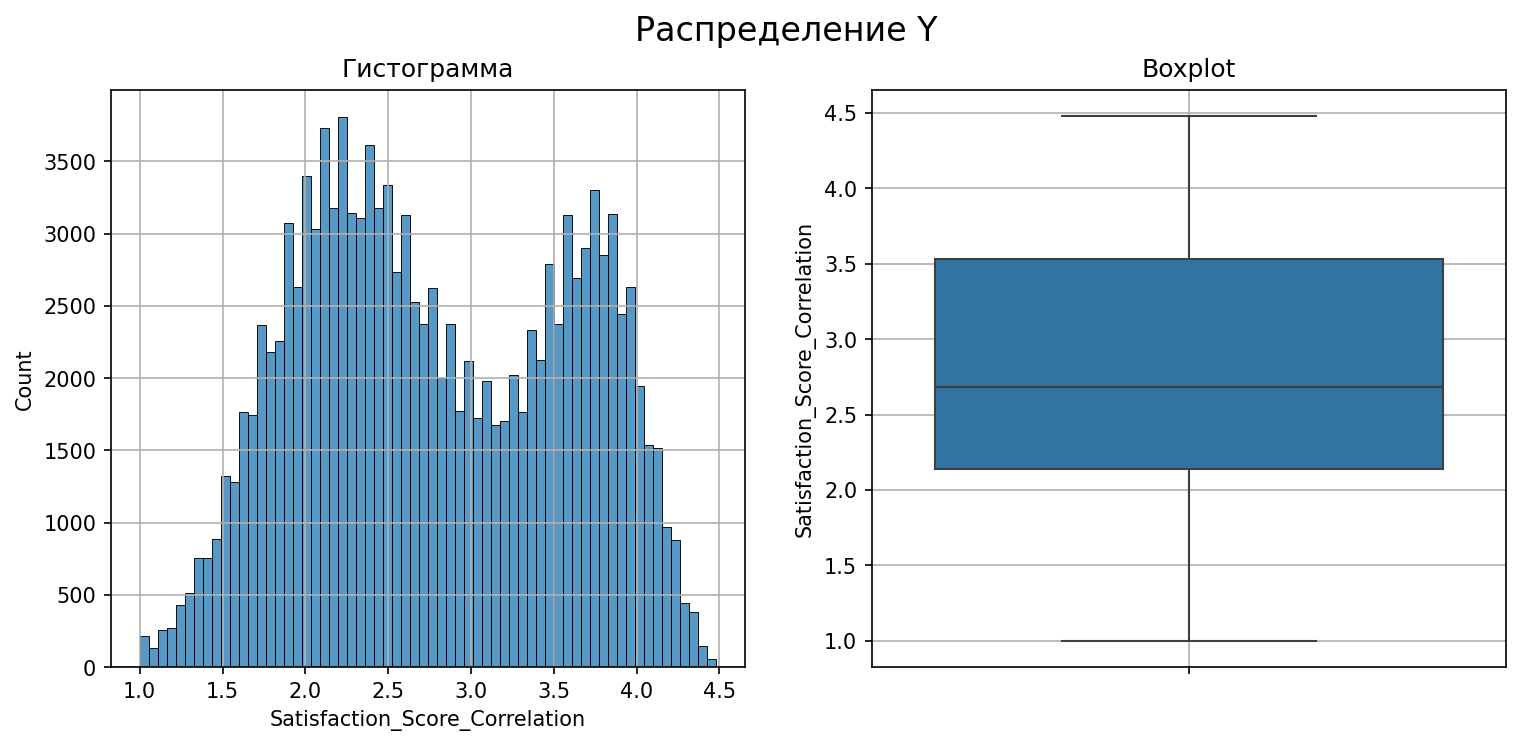

In [56]:
fig, axes = plt.subplots(1,2 ,figsize=(12, 5), dpi=150)

sns.histplot(df['Satisfaction_Score_Correlation'],ax=axes[0])
axes[0].set_title('Гистограмма')
axes[0].grid(True)


sns.boxplot(df['Satisfaction_Score_Correlation'],ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].grid(True)

fig.suptitle('Распределение Y', fontsize=16)


In [57]:
df['Satisfaction_Score_Correlation'].unique()

array([2.72, 4.24, 3.6 , 3.7 , 3.33, 3.82, 3.87, 3.15, 2.62, 3.96, 1.75,
       1.58, 2.43, 2.24, 2.04, 2.47, 2.85, 2.51, 2.82, 1.78, 2.5 , 1.91,
       2.94, 3.06, 3.88, 4.1 , 3.94, 3.78, 3.74, 3.5 , 2.08, 3.34, 1.64,
       4.19, 3.35, 3.76, 3.52, 3.58, 3.64, 3.39, 3.63, 3.43, 3.9 , 3.59,
       2.23, 2.33, 3.16, 4.25, 3.27, 2.14, 2.42, 4.06, 4.04, 3.95, 3.48,
       3.65, 3.42, 2.44, 3.37, 2.39, 1.97, 1.48, 2.15, 1.98, 1.94, 2.03,
       1.66, 3.67, 2.4 , 3.14, 3.26, 1.74, 1.37, 1.76, 2.97, 1.69, 2.55,
       4.22, 1.54, 1.19, 1.45, 1.99, 1.52, 3.84, 3.47, 2.81, 3.49, 3.56,
       3.55, 4.14, 3.81, 2.  , 3.31, 4.12, 2.05, 2.6 , 2.31, 2.01, 1.73,
       3.28, 1.9 , 2.78, 2.17, 2.96, 2.84, 2.1 , 3.62, 2.77, 2.22, 2.21,
       2.09, 3.44, 2.53, 3.4 , 3.79, 4.07, 2.61, 3.83, 2.13, 1.96, 2.65,
       4.31, 3.97, 4.15, 2.12, 1.5 , 2.67, 1.88, 2.3 , 3.23, 2.99, 2.66,
       4.09, 2.74, 2.34, 2.59, 3.07, 2.2 , 3.19, 1.86, 3.92, 2.8 , 4.16,
       1.57, 3.17, 2.45, 2.27, 3.21, 2.89, 3.69, 2.

In [58]:
lst_1=[]
lst_0=[]
for i in range(0,df.shape[0]):
    if df['Satisfaction_Score_Correlation'].iloc[i]>=3.01:
        lst_1.append(df['Satisfaction_Score_Correlation'].iloc[i])
    else:
        lst_0.append(df['Satisfaction_Score_Correlation'].iloc[i])   
print(len(lst_1)/df.shape[0]*100)
print(len(lst_0)/df.shape[0]*100)

40.03027330928974
59.96972669071027


In [59]:
df=df.drop(['Satisfaction'],axis=1)

In [60]:
X=df.drop('Satisfaction_Score_Correlation',axis=1)
y=df['Satisfaction_Score_Correlation']
scaler=StandardScaler()
X_norm=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, test_size=0.2, random_state=42
)


In [61]:
from xgboost import XGBRegressor


def objective_xgb(params):
    model_xgb = XGBRegressor(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_child_weight=int(params['min_child_weight']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda'],
        gamma=params['gamma'],
        random_state=42,
        n_jobs=-1 
    )

    model_xgb.fit(X_train, y_train)
    y_pred_xgb = model_xgb.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_xgb)

    return {'loss': mse, 'status': STATUS_OK}

space_xgb = {
    'n_estimators': hp.quniform('n_estimators', 50, 800, 50),
    'learning_rate': hp.uniform('learning_rate', 0.0001, 0.3),  
    'max_depth': hp.quniform('max_depth', 4, 12, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 8, 1),
    'subsample': hp.uniform('subsample', 0.7, 0.95),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.7, 0.95),
    'reg_alpha': hp.uniform('reg_alpha', 0.01, 0.5),
    'reg_lambda': hp.uniform('reg_lambda', 0.5, 2.0),
    'gamma': hp.uniform('gamma', 0.01, 0.3)
}

trials = Trials()

best_xgb = fmin(
    fn=objective_xgb,
    space=space_xgb,
    algo=tpe.suggest,
    max_evals=40,
    trials=trials,
    rstate=np.random.default_rng(42)
)


best_xgb_model = XGBRegressor(
    n_estimators=int(best_xgb['n_estimators']),
    learning_rate=best_xgb['learning_rate'],
    max_depth=int(best_xgb['max_depth']),
    min_child_weight=int(best_xgb['min_child_weight']),
    subsample=best_xgb['subsample'],
    colsample_bytree=best_xgb['colsample_bytree'],
    reg_alpha=best_xgb['reg_alpha'],
    reg_lambda=best_xgb['reg_lambda'],
    gamma=best_xgb['gamma'],
    random_state=42,
    n_jobs=-1
)

best_xgb_model.fit(X_train, y_train)
y_pred_train_xgb = best_xgb_model.predict(X_train)
y_pred_test_xgb = best_xgb_model.predict(X_test)

mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)

mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

print(f"{'MSE'}train {mse_train_xgb} test: {mse_test_xgb} delta: {mse_test_xgb - mse_train_xgb}")
print(f"{'MAE'} train{mae_train_xgb} test: {mae_test_xgb} delta: {mae_test_xgb - mae_train_xgb}")
print(f"{'R²'} train{r2_train_xgb} test: {r2_test_xgb} delta: {r2_test_xgb - r2_train_xgb}")



100%|██████████| 40/40 [02:28<00:00,  3.71s/trial, best loss: 0.03719160074902287] 
MSEtrain 0.022824029291741283 test: 0.03719160074902287 delta: 0.014367571457281587
MAE train0.12043662886835044 test: 0.15331251171327703 delta: 0.032875882844926596
R² train0.9642777633510522 test: 0.94165139394025 delta: -0.022626369410802205


In [62]:
y_pred_test_xgb.shape

(25898,)

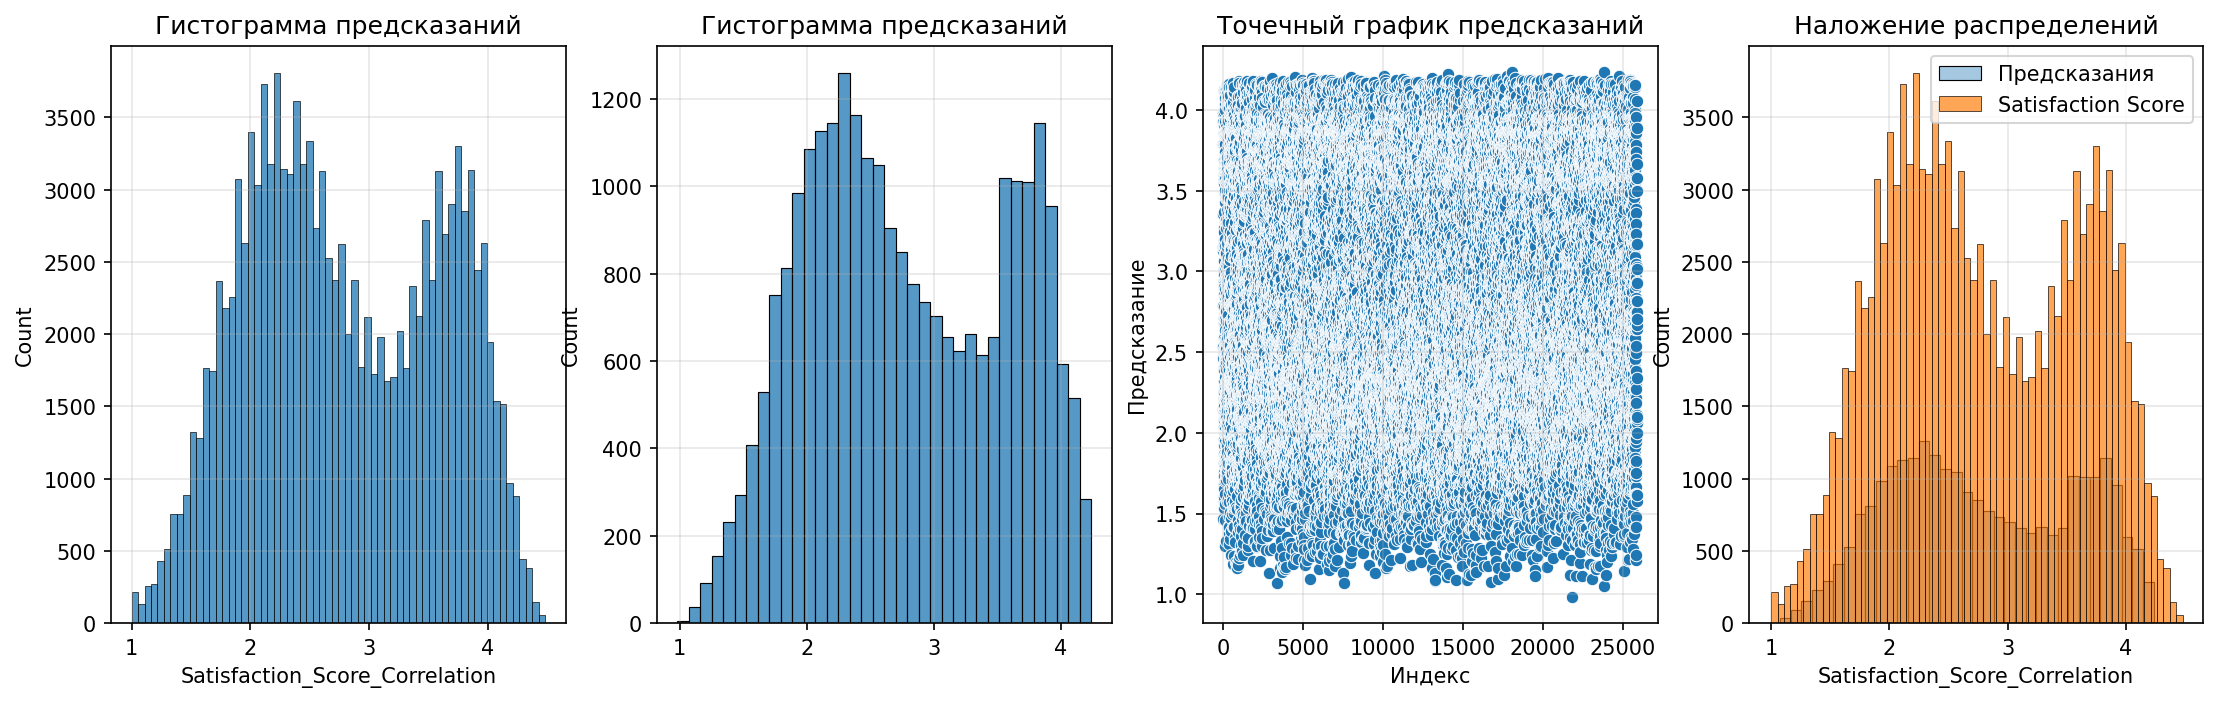

In [63]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), dpi=150)

sns.histplot(df['Satisfaction_Score_Correlation'], ax=axes[0])
axes[0].set_title('Гистограмма предсказаний')
axes[0].grid(True, alpha=0.3)

sns.histplot(y_pred_test_xgb, ax=axes[1])
axes[1].set_title('Гистограмма предсказаний')
axes[1].grid(True, alpha=0.3)

sns.scatterplot(x=range(len(y_pred_test_xgb)), y=y_pred_test_xgb, ax=axes[2])
axes[2].set_title('Точечный график предсказаний')
axes[2].set_xlabel('Индекс')
axes[2].set_ylabel('Предсказание')
axes[2].grid(True, alpha=0.3)

sns.histplot(y_pred_test_xgb, label='Предсказания', alpha=0.4, ax=axes[3])
sns.histplot(df['Satisfaction_Score_Correlation'], label='Satisfaction Score', alpha=0.7, ax=axes[3])
axes[3].set_title('Наложение распределений')
axes[3].legend()
axes[3].grid(True, alpha=0.3)


In [64]:
def objective_gb(params):
    model_gb = GradientBoostingRegressor(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        max_features=params['max_features_val'], 
        subsample=params['subsample'],
        random_state=42,
        validation_fraction=0.1
    )

    model_gb.fit(X_train, y_train)
    y_pred_gb = model_gb.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_gb)

    return {'loss': mse, 'status': STATUS_OK}

max_features_opts = [0.7, 0.8, 0.9, 1.0]  

space_gb = {
    'n_estimators': hp.quniform('n_estimators', 100, 400, 50),    
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.2),      
    'max_depth': hp.quniform('max_depth', 4, 7, 1),              
    'min_samples_split': hp.quniform('min_samples_split', 5, 15, 5), 
    'min_samples_leaf': hp.quniform('min_samples_leaf', 3, 10, 3),   
    'subsample': hp.uniform('subsample', 0.8, 1.0),              
    'max_features_val': hp.choice('max_features_val', max_features_opts)
}

trials = Trials()

best_gb = fmin(
    fn=objective_gb,
    space=space_gb,
    algo=tpe.suggest,
    max_evals=5,  
    trials=trials,
    rstate=np.random.default_rng(42),
    show_progressbar=True
)


print(f"n_estimators: {int(best_gb['n_estimators'])}")
print(f"learning_rate: {best_gb['learning_rate']:.6f}")
print(f"max_depth: {int(best_gb['max_depth'])}")
print(f"min_samples_split: {int(best_gb['min_samples_split'])}")
print(f"min_samples_leaf: {int(best_gb['min_samples_leaf'])}")
print(f"subsample: {best_gb['subsample']:.6f}")
print(f"max_features: {max_features_opts[best_gb['max_features_val']]}")

best_gb_model = GradientBoostingRegressor(
    n_estimators=int(best_gb['n_estimators']),
    learning_rate=best_gb['learning_rate'],
    max_depth=int(best_gb['max_depth']),
    min_samples_leaf=int(best_gb['min_samples_leaf']),
    min_samples_split=int(best_gb['min_samples_split']),
    max_features=max_features_opts[best_gb['max_features_val']],  
    subsample=best_gb['subsample'],
    random_state=42,
    n_iter_no_change=10,  
    validation_fraction=0.1,
    tol=1e-4
)

best_gb_model.fit(X_train, y_train)
y_pred_train_gb = best_gb_model.predict(X_train)
y_pred_test_gb = best_gb_model.predict(X_test)

mse_train_gb = mean_squared_error(y_train, y_pred_train_gb)
mae_train_gb = mean_absolute_error(y_train, y_pred_train_gb)
r2_train_gb = r2_score(y_train, y_pred_train_gb)

mse_test_gb = mean_squared_error(y_test, y_pred_test_gb)
mae_test_gb = mean_absolute_error(y_test, y_pred_test_gb)
r2_test_gb = r2_score(y_test, y_pred_test_gb)

print(f"{'MSE'}train {mse_train_gb} test: {mse_test_gb} delta: {mse_test_gb - mse_train_gb}")
print(f"{'MAE'} train{mae_train_gb} test: {mae_test_gb} delta: {mae_test_gb - mae_train_gb}")
print(f"{'R²'} train{r2_train_gb} test: {r2_test_gb} delta: {r2_test_gb - r2_train_gb}")




  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 5/5 [05:28<00:00, 65.76s/trial, best loss: 0.03939535419154314] 
n_estimators: 100
learning_rate: 0.183672
max_depth: 6
min_samples_split: 10
min_samples_leaf: 3
subsample: 0.829393
max_features: 0.9
MSEtrain 0.03757080091807634 test: 0.04023175043254307 delta: 0.002660949514466729
MAE train0.15350996586991883 test: 0.15878824097207103 delta: 0.005278275102152202
R² train0.9411973659720257 test: 0.9368818090696377 delta: -0.004315556902388051


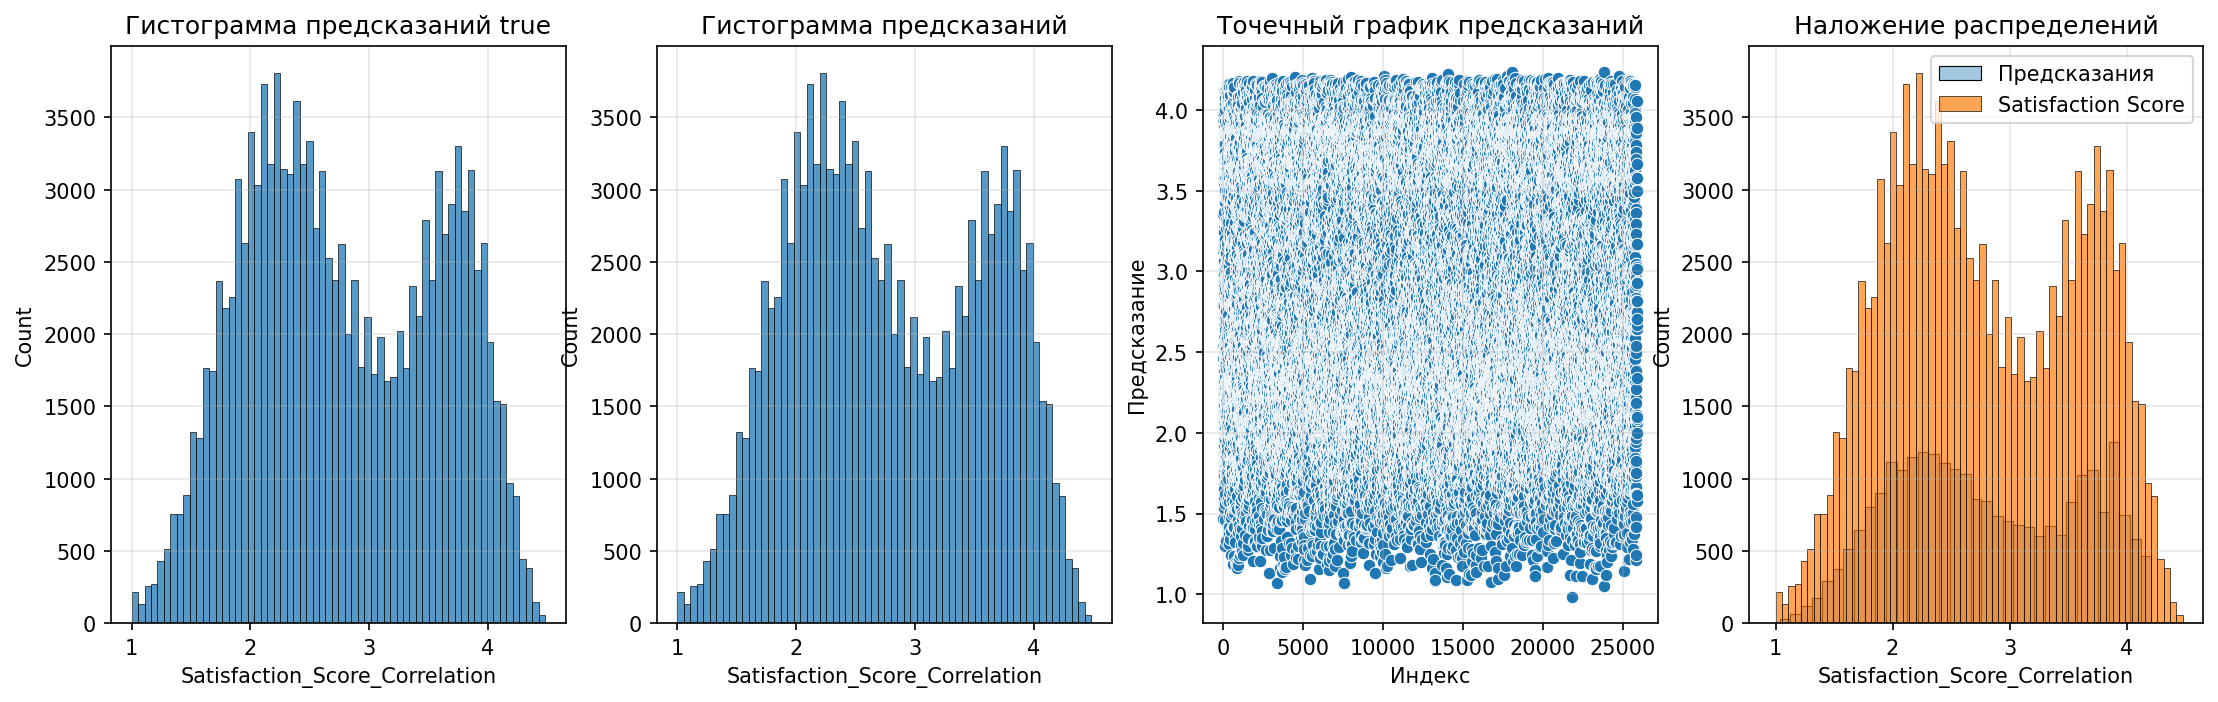

In [65]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), dpi=150)

sns.histplot(df['Satisfaction_Score_Correlation'], ax=axes[0])
axes[0].set_title('Гистограмма предсказаний true')
axes[0].grid(True, alpha=0.3)

sns.histplot(df['Satisfaction_Score_Correlation'], ax=axes[1])
axes[1].set_title('Гистограмма предсказаний')
axes[1].grid(True, alpha=0.3)

sns.scatterplot(x=range(len(y_pred_test_xgb)), y=y_pred_test_xgb, ax=axes[2])
axes[2].set_title('Точечный график предсказаний')
axes[2].set_xlabel('Индекс')
axes[2].set_ylabel('Предсказание')
axes[2].grid(True, alpha=0.3)

sns.histplot(y_pred_test_gb, label='Предсказания', alpha=0.4, ax=axes[3])
sns.histplot(df['Satisfaction_Score_Correlation'], label='Satisfaction Score', alpha=0.7, ax=axes[3])
axes[3].set_title('Наложение распределений')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

In [66]:
def objective_random_forest(params):
    model_rf = RandomForestRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=params['max_depth'],
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        max_features=params['max_features'],
        min_impurity_decrease=params['min_impurity_decrease'],
        random_state=42,
        n_jobs=-1,  
        verbose=0
    )

    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_rf)

    return {'loss': mse, 'status': STATUS_OK}

space_random_forest = {
    'n_estimators': hp.quniform('n_estimators', 1000, 1200, 50),  
    'max_depth': hp.choice('max_depth', [6, 8, 10, 12, 15]),   
    'min_samples_split': hp.quniform('min_samples_split', 5, 20, 5),  
    'min_samples_leaf': hp.quniform('min_samples_leaf', 3, 15, 3),    
    'max_features': hp.choice('max_features', ['sqrt', 0.8, 0.9]),    
    'min_impurity_decrease': hp.uniform('min_impurity_decrease', 0.0, 0.0001)  
}
trials = Trials()

best_rf = fmin(
    fn=objective_random_forest,
    space=space_random_forest,
    algo=tpe.suggest,
    max_evals=5,
    trials=trials,
    rstate=np.random.default_rng(42)
)


max_depth_values = [4, 5, 6, 7, 8, 9, 10, 11, 12]
best_max_depth = max_depth_values[best_rf['max_depth']]

best_max_features_rf = max_features_opts[best_rf['max_features']]

print(f"n_estimators: {int(best_rf['n_estimators'])}")
print(f"max_depth: {best_max_depth}")
print(f"min_samples_split: {int(best_rf['min_samples_split'])}")
print(f"min_samples_leaf: {int(best_rf['min_samples_leaf'])}")
print(f"max_features: {best_max_features_rf}")
print(f"min_impurity_decrease: {best_rf['min_impurity_decrease']}")

best_rf_model = RandomForestRegressor(
    n_estimators=int(best_rf['n_estimators']),
    max_depth=best_max_depth,
    min_samples_leaf=int(best_rf['min_samples_leaf']),      
    min_samples_split=int(best_rf['min_samples_split']),    
    max_features=best_max_features_rf,
    min_impurity_decrease=best_rf['min_impurity_decrease'],
    random_state=42,
)

best_rf_model.fit(X_train, y_train)
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f"{'MSE'}  train: {mse_train_rf}  test: {mse_test_rf}  delta: {mse_test_rf - mse_train_rf}")
print(f"{'MAE'}  train: {mae_train_rf}  test: {mae_test_rf}  delta: {mae_test_rf - mae_train_rf}")
print(f"{'R²'}  train: {r2_train_rf}  test: {r2_test_rf}  delta: {r2_test_rf - r2_train_rf}")
    

  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 5/5 [07:13<00:00, 86.61s/trial, best loss: 0.04842919167962616] 
n_estimators: 1050
max_depth: 6
min_samples_split: 15
min_samples_leaf: 12
max_features: 0.9
min_impurity_decrease: 5.993618908140053e-06
MSE  train: 0.07372074004104112  test: 0.07483951790231513  delta: 0.0011187778612740118
MAE  train: 0.20877017778819526  test: 0.21041677805662332  delta: 0.0016466002684280556
R²  train: 0.8846185444287642  test: 0.8825868889792672  delta: -0.0020316554494970163


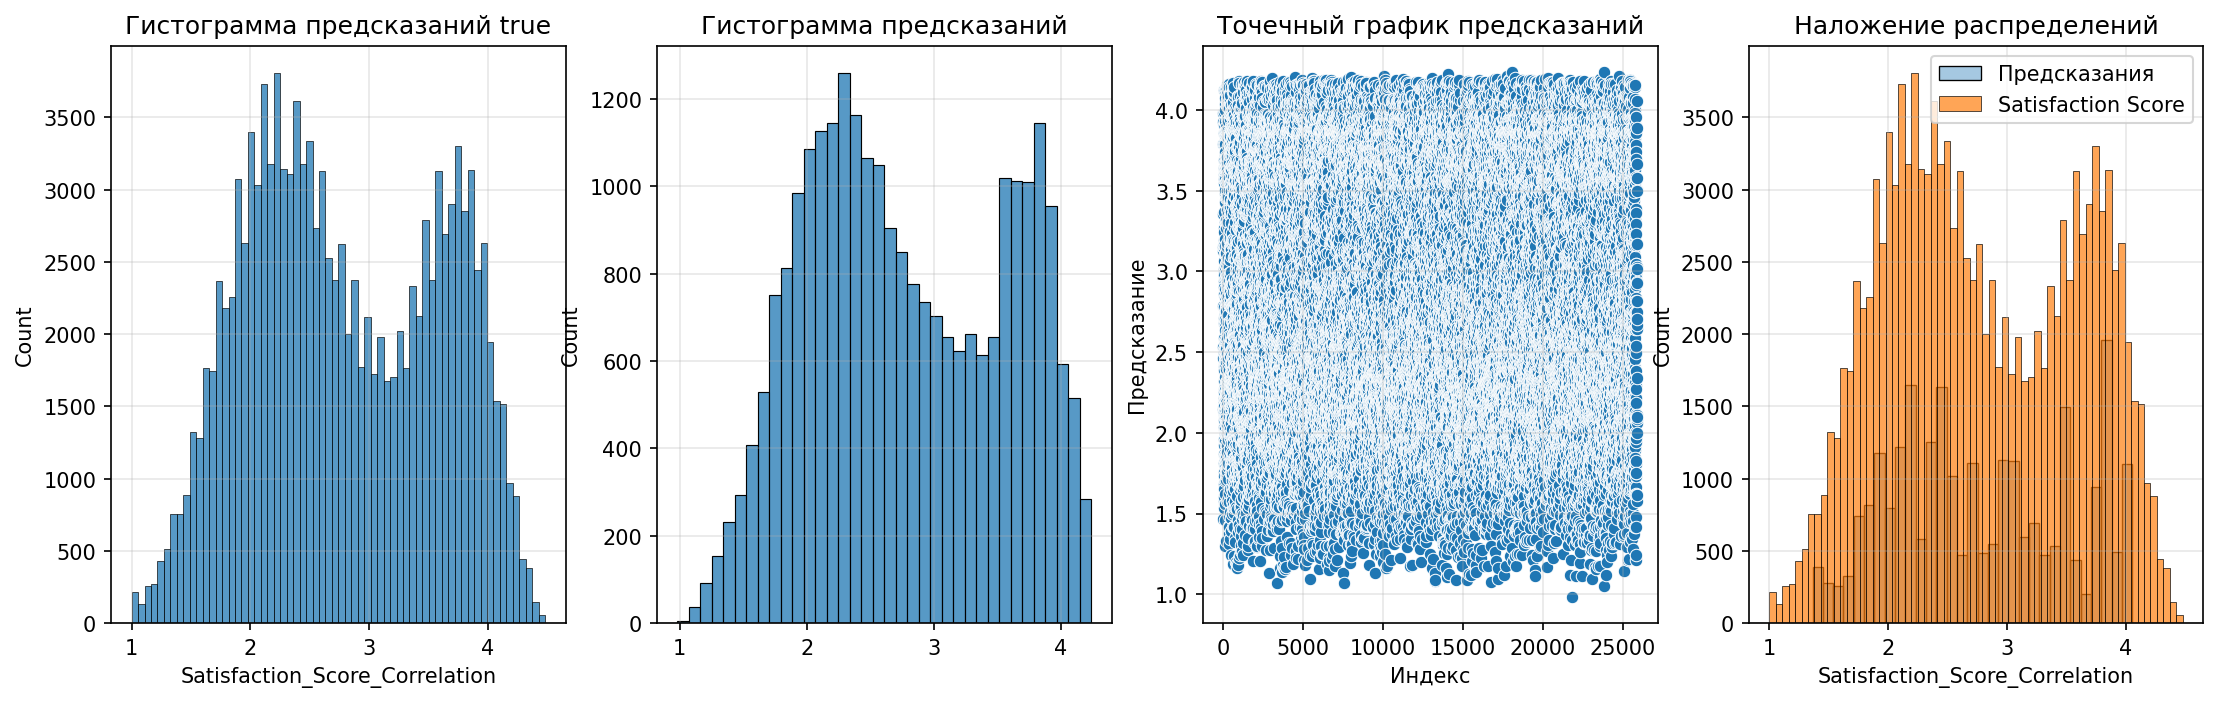

In [67]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), dpi=150)

sns.histplot(df['Satisfaction_Score_Correlation'], ax=axes[0])
axes[0].set_title('Гистограмма предсказаний true')
axes[0].grid(True, alpha=0.3)

sns.histplot(y_pred_test_xgb, ax=axes[1])
axes[1].set_title('Гистограмма предсказаний')
axes[1].grid(True, alpha=0.3)

sns.scatterplot(x=range(len(y_pred_test_xgb)), y=y_pred_test_xgb, ax=axes[2])
axes[2].set_title('Точечный график предсказаний')
axes[2].set_xlabel('Индекс')
axes[2].set_ylabel('Предсказание')
axes[2].grid(True, alpha=0.3)

sns.histplot(y_pred_test_rf, label='Предсказания', alpha=0.4, ax=axes[3])
sns.histplot(df['Satisfaction_Score_Correlation'], label='Satisfaction Score', alpha=0.7, ax=axes[3])
axes[3].set_title('Наложение распределений')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

In [68]:

def objective_linear(params):
    model_lr = LinearRegression(
        fit_intercept=params['fit_intercept'],
        copy_X=params['copy_X'],
        n_jobs=int(params['n_jobs'])
    )
    
    model_lr.fit(X_train, y_train)
    y_pred_lr = model_lr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_lr)
    
    return {'loss': mse, 'status': STATUS_OK}
    

space_linear = {
    'fit_intercept': hp.choice('fit_intercept', [True, False]),
    'copy_X': hp.choice('copy_X', [True, False]),
    'n_jobs': hp.choice('n_jobs', [-1, 1, 2, 4])
}

trials = Trials()

best_linear = fmin(
    fn=objective_linear,
    space=space_linear,
    algo=tpe.suggest,
    max_evals=200,  
    trials=trials,
    rstate=np.random.default_rng(42)
)


best_lr_model = LinearRegression(
    fit_intercept=[True, False][best_linear['fit_intercept']],
    copy_X=[True, False][best_linear['copy_X']],
    n_jobs=[-1, 1, 2, 4][best_linear['n_jobs']]
)

best_lr_model.fit(X_train, y_train)
y_pred_train_lr = best_lr_model.predict(X_train)
y_pred_test_lr = best_lr_model.predict(X_test)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mae_train_lr = mean_absolute_error(y_train, y_pred_train_lr)
r2_train_lr = r2_score(y_train, y_pred_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)

print(f"{'MSE'}train {mse_train_lr} test: {mse_test_lr} delta: {mse_test_lr - mse_train_lr}")
print(f"{'MAE'} train{mae_train_lr} test: {mae_test_lr} delta: {mae_test_lr - mae_train_lr}")
print(f"{'R²'} train{r2_train_lr} test: {r2_test_lr} delta: {r2_test_lr - r2_train_lr}")



  0%|          | 0/200 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 200/200 [00:15<00:00, 12.73trial/s, best loss: 0.07426441356058042]
MSEtrain 0.07305870995262907 test: 0.07426755472842976 delta: 0.0012088447758006882
MAE train0.21227654800634638 test: 0.2144582201829559 delta: 0.002181672176609528
R² train0.8856546978259006 test: 0.8834842220663512 delta: -0.0021704757595493174


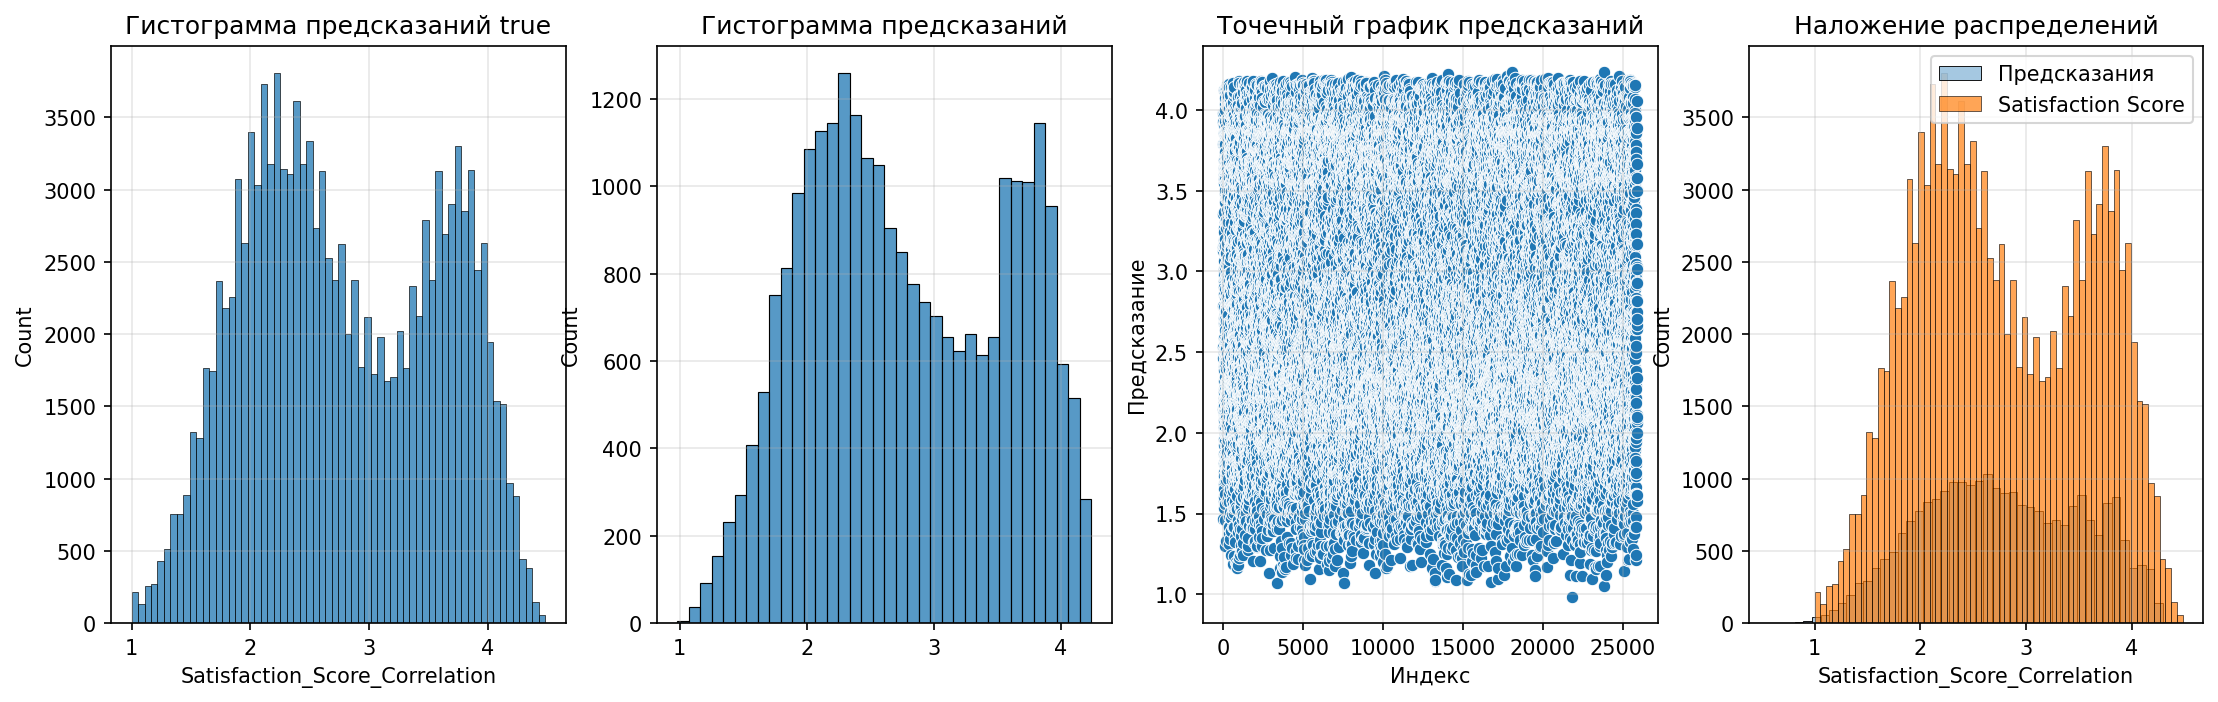

In [69]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), dpi=150)

sns.histplot(df['Satisfaction_Score_Correlation'], ax=axes[0])
axes[0].set_title('Гистограмма предсказаний true')
axes[0].grid(True, alpha=0.3)

sns.histplot(y_pred_test_xgb, ax=axes[1])
axes[1].set_title('Гистограмма предсказаний')
axes[1].grid(True, alpha=0.3)

sns.scatterplot(x=range(len(y_pred_test_xgb)), y=y_pred_test_xgb, ax=axes[2])
axes[2].set_title('Точечный график предсказаний')
axes[2].set_xlabel('Индекс')
axes[2].set_ylabel('Предсказание')
axes[2].grid(True, alpha=0.3)

sns.histplot(y_pred_test_lr, label='Предсказания', alpha=0.4, ax=axes[3])
sns.histplot(df['Satisfaction_Score_Correlation'], label='Satisfaction Score', alpha=0.7, ax=axes[3])
axes[3].set_title('Наложение распределений')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

In [70]:

def objective_lgb(params):
    model_lgb = LGBMRegressor(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        num_leaves=int(params['num_leaves']),
        min_child_samples=int(params['min_child_samples']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda'],
        random_state=42,
        n_jobs=-1 ,# ускорение
        verbose=-1
    )

    model_lgb.fit(X_train, y_train)
    y_pred_lgb = model_lgb.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_lgb)

    return {'loss': mse, 'status': STATUS_OK}

space_lgb = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 50),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),  
    'max_depth': hp.quniform('max_depth', 3, 12, 1),
    'num_leaves': hp.quniform('num_leaves', 20, 150, 5),
    'min_child_samples': hp.quniform('min_child_samples', 5, 100, 5),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1)
}

trials = Trials()

best_lgb = fmin(
    fn=objective_lgb,
    space=space_lgb,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(42)
)



best_lgb_model = LGBMRegressor(
    n_estimators=int(best_lgb['n_estimators']),
    learning_rate=best_lgb['learning_rate'],
    max_depth=int(best_lgb['max_depth']),
    num_leaves=int(best_lgb['num_leaves']),
    min_child_samples=int(best_lgb['min_child_samples']),
    subsample=best_lgb['subsample'],
    colsample_bytree=best_lgb['colsample_bytree'],
    reg_alpha=best_lgb['reg_alpha'],
    reg_lambda=best_lgb['reg_lambda'],
    random_state=42,
    n_jobs=-1,
    verbose=-1# 2 мой ноутбук не тянет
)

best_lgb_model.fit(X_train, y_train)
y_pred_train_lgb = best_lgb_model.predict(X_train)
y_pred_test_lgb = best_lgb_model.predict(X_test)

mse_train_lgb = mean_squared_error(y_train, y_pred_train_lgb)
mae_train_lgb = mean_absolute_error(y_train, y_pred_train_lgb)
r2_train_lgb = r2_score(y_train, y_pred_train_lgb)

mse_test_lgb = mean_squared_error(y_test, y_pred_test_lgb)
mae_test_lgb = mean_absolute_error(y_test, y_pred_test_lgb)
r2_test_lgb = r2_score(y_test, y_pred_test_lgb)

print(f"{'MSE'}train {mse_train_lgb} test: {mse_test_lgb} delta: {mse_test_lgb - mse_train_lgb}")
print(f"{'MAE'} train{mae_train_lgb} test: {mae_test_lgb} delta: {mae_test_lgb - mae_train_lgb}")
print(f"{'R²'} train{r2_train_lgb} test: {r2_test_lgb} delta: {r2_test_lgb - r2_train_lgb}")

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



  4%|▍         | 2/50 [00:09<03:38,  4.55s/trial, best loss: 0.0377013971898758]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



  6%|▌         | 3/50 [00:12<02:57,  3.79s/trial, best loss: 0.0377013971898758]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



  8%|▊         | 4/50 [00:13<01:59,  2.59s/trial, best loss: 0.0377013971898758]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 10%|█         | 5/50 [00:16<01:55,  2.58s/trial, best loss: 0.0377013971898758]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 14%|█▍        | 7/50 [00:25<02:29,  3.47s/trial, best loss: 0.0377013971898758]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 16%|█▌        | 8/50 [00:27<02:13,  3.18s/trial, best loss: 0.0377013971898758]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 18%|█▊        | 9/50 [00:35<03:07,  4.56s/trial, best loss: 0.0377013971898758]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 20%|██        | 10/50 [00:38<02:49,  4.25s/trial, best loss: 0.0377013971898758]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 24%|██▍       | 12/50 [00:49<02:48,  4.42s/trial, best loss: 0.0377013971898758]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 26%|██▌       | 13/50 [00:53<02:45,  4.47s/trial, best loss: 0.0377013971898758]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 30%|███       | 15/50 [01:01<02:20,  4.01s/trial, best loss: 0.0377013971898758]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 34%|███▍      | 17/50 [01:07<01:49,  3.30s/trial, best loss: 0.0377013971898758]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 36%|███▌      | 18/50 [01:08<01:27,  2.74s/trial, best loss: 0.0377013971898758]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 38%|███▊      | 19/50 [01:11<01:27,  2.81s/trial, best loss: 0.0377013971898758]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 40%|████      | 20/50 [01:13<01:19,  2.66s/trial, best loss: 0.0377013971898758]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 44%|████▍     | 22/50 [01:20<01:19,  2.86s/trial, best loss: 0.0377013971898758]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 46%|████▌     | 23/50 [01:22<01:16,  2.84s/trial, best loss: 0.0377013971898758]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 50%|█████     | 25/50 [01:29<01:18,  3.13s/trial, best loss: 0.037660874702272674]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 52%|█████▏    | 26/50 [01:33<01:20,  3.36s/trial, best loss: 0.037660874702272674]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 54%|█████▍    | 27/50 [01:37<01:17,  3.36s/trial, best loss: 0.037660874702272674]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 56%|█████▌    | 28/50 [01:41<01:20,  3.64s/trial, best loss: 0.0373970034734817]  

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 58%|█████▊    | 29/50 [01:47<01:28,  4.21s/trial, best loss: 0.0373970034734817]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 60%|██████    | 30/50 [01:54<01:41,  5.09s/trial, best loss: 0.0373970034734817]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 62%|██████▏   | 31/50 [01:58<01:33,  4.94s/trial, best loss: 0.0373970034734817]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 64%|██████▍   | 32/50 [02:03<01:25,  4.77s/trial, best loss: 0.0373970034734817]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 66%|██████▌   | 33/50 [02:08<01:24,  4.95s/trial, best loss: 0.0373970034734817]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 68%|██████▊   | 34/50 [02:13<01:19,  4.97s/trial, best loss: 0.0373970034734817]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 70%|███████   | 35/50 [02:21<01:29,  5.94s/trial, best loss: 0.0373970034734817]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 72%|███████▏  | 36/50 [02:27<01:21,  5.80s/trial, best loss: 0.0373970034734817]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 74%|███████▍  | 37/50 [02:31<01:08,  5.29s/trial, best loss: 0.0373970034734817]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 78%|███████▊  | 39/50 [02:35<00:38,  3.52s/trial, best loss: 0.0373970034734817]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 82%|████████▏ | 41/50 [02:42<00:31,  3.52s/trial, best loss: 0.0373970034734817]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 86%|████████▌ | 43/50 [02:48<00:22,  3.18s/trial, best loss: 0.0373970034734817]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 88%|████████▊ | 44/50 [02:53<00:22,  3.83s/trial, best loss: 0.0373970034734817]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 92%|█████████▏| 46/50 [03:01<00:14,  3.71s/trial, best loss: 0.0373970034734817]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 94%|█████████▍| 47/50 [03:03<00:09,  3.10s/trial, best loss: 0.0373970034734817]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



 98%|█████████▊| 49/50 [03:08<00:02,  2.93s/trial, best loss: 0.0373970034734817]

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(

c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



100%|██████████| 50/50 [03:13<00:00,  3.86s/trial, best loss: 0.0373970034734817]


c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\kiril\anaconda3\envs\ML_TMS_test\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


MSEtrain 0.02822024304487732 test: 0.0373970034734817 delta: 0.009176760428604384
MAE train0.1343967570622952 test: 0.15356462331981235 delta: 0.019167866257517152
R² train0.9558320668338478 test: 0.9413291447653913 delta: -0.014502922068456492


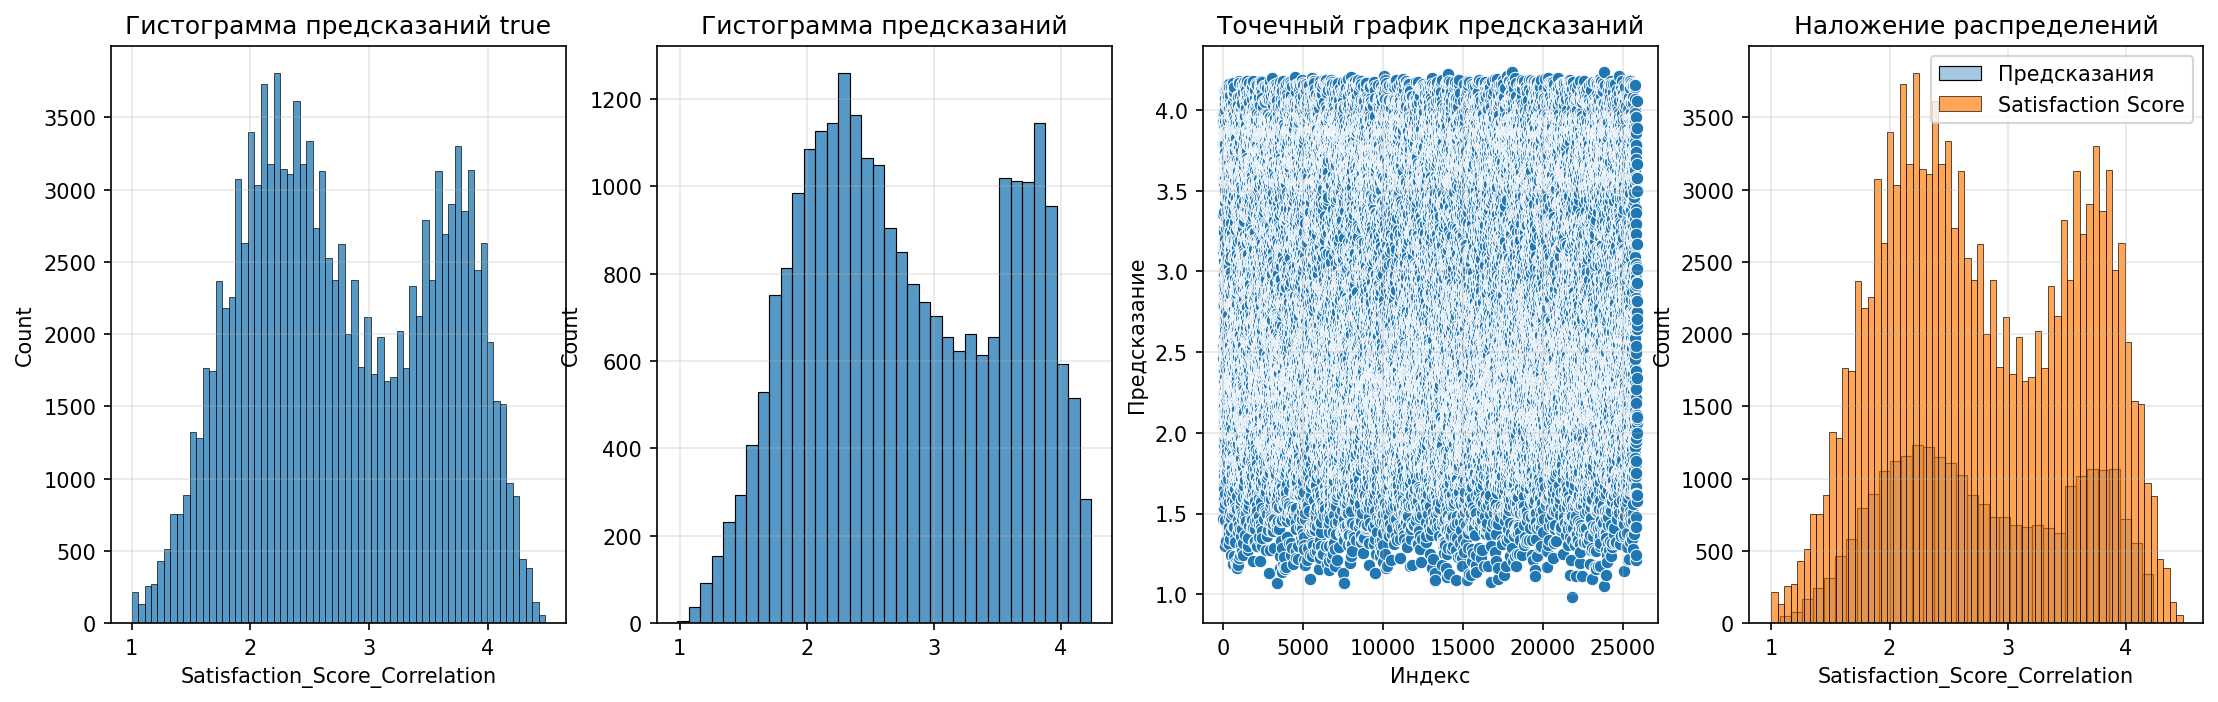

In [71]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), dpi=150)

sns.histplot(df['Satisfaction_Score_Correlation'], ax=axes[0])
axes[0].set_title('Гистограмма предсказаний true')
axes[0].grid(True, alpha=0.3)

sns.histplot(y_pred_test_xgb, ax=axes[1])
axes[1].set_title('Гистограмма предсказаний')
axes[1].grid(True, alpha=0.3)

sns.scatterplot(x=range(len(y_pred_test_xgb)), y=y_pred_test_xgb, ax=axes[2])
axes[2].set_title('Точечный график предсказаний')
axes[2].set_xlabel('Индекс')
axes[2].set_ylabel('Предсказание')
axes[2].grid(True, alpha=0.3)

sns.histplot(y_pred_test_lgb, label='Предсказания', alpha=0.4, ax=axes[3])
sns.histplot(df['Satisfaction_Score_Correlation'], label='Satisfaction Score', alpha=0.7, ax=axes[3])
axes[3].set_title('Наложение распределений')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

In [72]:

def objective_catboost(params):
    model_cb = CatBoostRegressor(
        iterations=int(params['iterations']),
        learning_rate=params['learning_rate'],
        depth=int(params['depth']),
        l2_leaf_reg=params['l2_leaf_reg'],
        random_strength=params['random_strength'],
        bagging_temperature=params['bagging_temperature'],
        border_count=int(params['border_count']),
        random_state=42,
        verbose=False,  
        thread_count=-1  # ускорение
    )

    model_cb.fit(X_train, y_train)
    y_pred_cb = model_cb.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_cb)

    return {'loss': mse, 'status': STATUS_OK}

space_catboost = {
    'iterations': hp.quniform('iterations', 100, 1000, 50), 
    'learning_rate': hp.loguniform('learning_rate', -3, 0),  
    'depth': hp.quniform('depth', 4, 10, 1),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10),
    'random_strength': hp.uniform('random_strength', 0, 2),
    'bagging_temperature': hp.uniform('bagging_temperature', 0, 1),
    'border_count': hp.quniform('border_count', 32, 255, 1)
}

trials = Trials()

best_cb = fmin(
    fn=objective_catboost,
    space=space_catboost,
    algo=tpe.suggest,
    max_evals=10,
    trials=trials,
    rstate=np.random.default_rng(42)
)


best_cb_model = CatBoostRegressor(
    iterations=int(best_cb['iterations']),
    learning_rate=best_cb['learning_rate'],
    depth=int(best_cb['depth']),
    l2_leaf_reg=best_cb['l2_leaf_reg'],
    random_strength=best_cb['random_strength'],
    bagging_temperature=best_cb['bagging_temperature'],
    border_count=int(best_cb['border_count']),
    random_state=42,
    verbose=False,
    thread_count=-1
)

best_cb_model.fit(X_train, y_train)
y_pred_cb = best_cb_model.predict(X_test)

mse_cb = mean_squared_error(y_test, y_pred_cb)
mae_cb = mean_absolute_error(y_test, y_pred_cb)
r2_cb = r2_score(y_test, y_pred_cb)

print(f"CatBoost MSE: {mse_cb}")
print(f"CatBoost MAE: {mae_cb}")
print(f"CatBoost R2: {r2_cb}")

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 10/10 [01:45<00:00, 10.60s/trial, best loss: 0.03678049186097343]
CatBoost MSE: 0.03678049186097343
CatBoost MAE: 0.15285564753590705
CatBoost R2: 0.9422963683450446


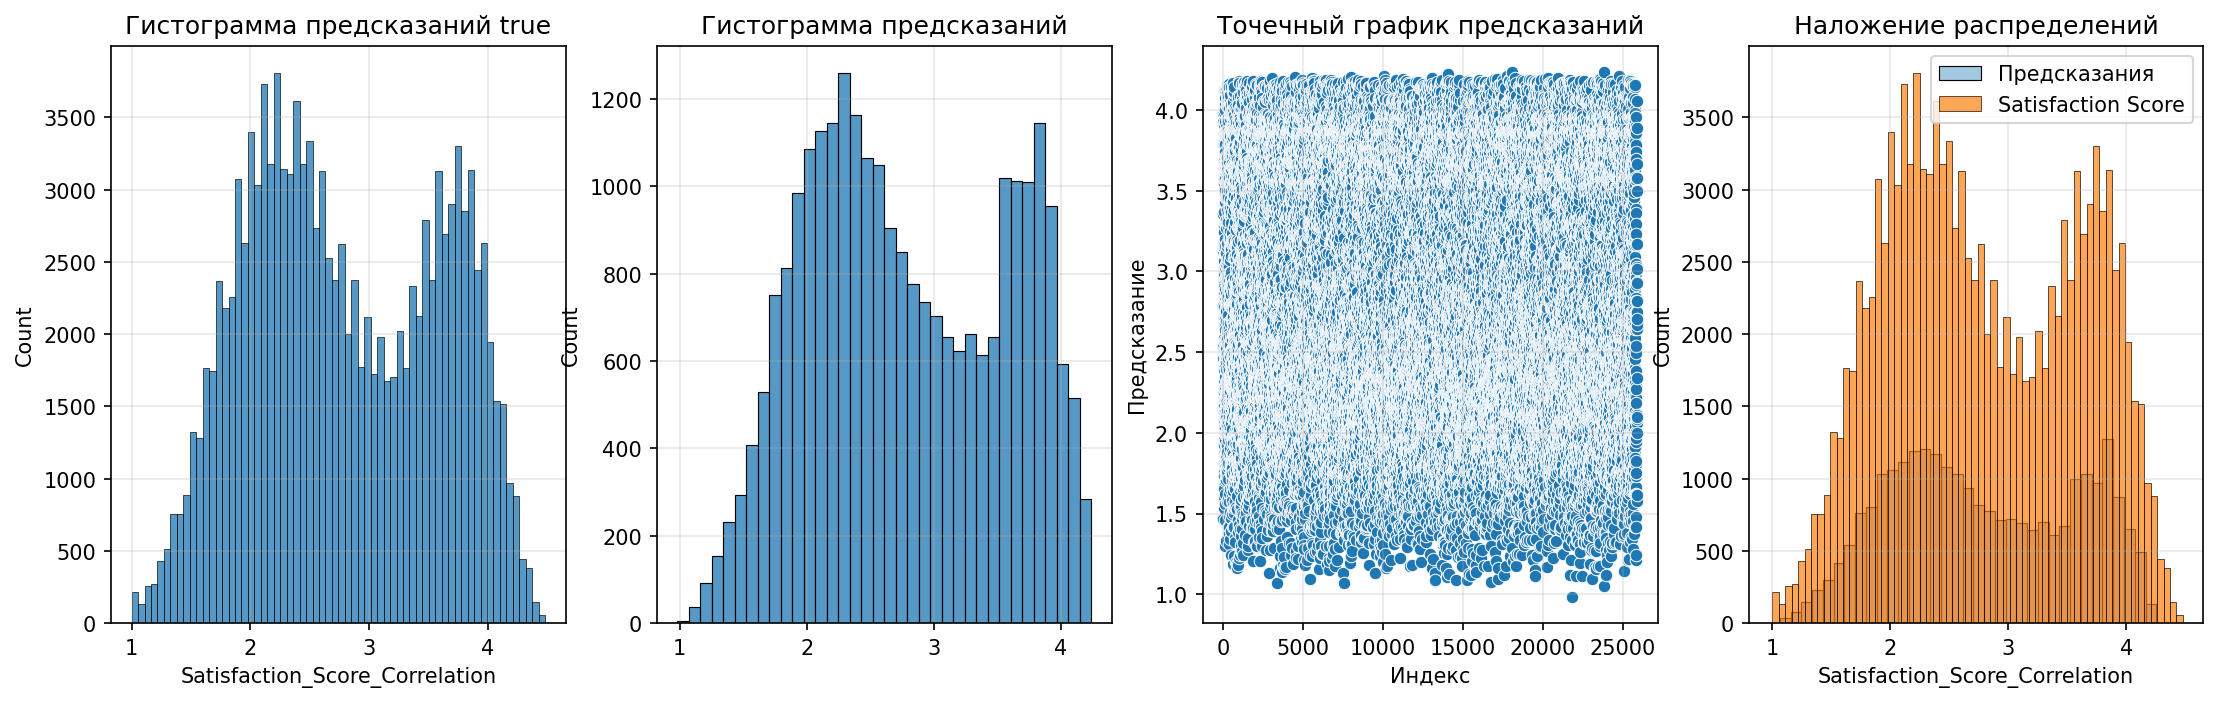

In [73]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), dpi=150)

sns.histplot(df['Satisfaction_Score_Correlation'], ax=axes[0])
axes[0].set_title('Гистограмма предсказаний true')
axes[0].grid(True, alpha=0.3)

sns.histplot(y_pred_test_xgb, ax=axes[1])
axes[1].set_title('Гистограмма предсказаний')
axes[1].grid(True, alpha=0.3)

sns.scatterplot(x=range(len(y_pred_test_xgb)), y=y_pred_test_xgb, ax=axes[2])
axes[2].set_title('Точечный график предсказаний')
axes[2].set_xlabel('Индекс')
axes[2].set_ylabel('Предсказание')
axes[2].grid(True, alpha=0.3)

sns.histplot(y_pred_cb, label='Предсказания', alpha=0.4, ax=axes[3])
sns.histplot(df['Satisfaction_Score_Correlation'], label='Satisfaction Score', alpha=0.7, ax=axes[3])
axes[3].set_title('Наложение распределений')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

| Модель          | MSE (test)       | MAE (test)       | R² (test)       |
|-----------------|------------------|------------------|-----------------|
| XGB             | 0.03719          | 0.15331          | 0.94165         |
| LightGBM        | 0.03740          | 0.15356          | 0.94133         |
| CatBoost        | 0.03678          | 0.15286          | 0.94230         |
| GradientBoosting| 0.04023          | 0.15879          | 0.93688         |
| RandomForest    | 0.07484          | 0.21042          | 0.88259         |
| LinearRegression| 0.07427          | 0.21446          | 0.88348         |

## Топ-3 модели:

### По MSE :
1. **CatBoost** - 0.03678
2. **XGB** - 0.03719  
3. **LightGBM** - 0.03740

### По MAE :
1. **CatBoost** - 0.15286
2. **XGB** - 0.15331
3. **LightGBM** - 0.15356

### По R2:
1. **CatBoost** - 0.94230
2. **XGB** - 0.94165
3. **LightGBM** - 0.94133